# Python для анализа данных

## Бот в Telegram

### Сбор статистики по Коронавирусу

*Ян Пиле, Яндекс.Маркет*

### Есть сайт с информацией о распространении вируса в мире
Я предлагаю достать оттуда информацию в виде Pandas dataframe а затем по запросу пользователя в телеграм выгружать ее

Импортируем requests и запишем адрес сайта со статистикой по COVID в переменную

In [1]:
# !python -m pip install --upgrade pip

In [2]:
# !pip3 install tabulate

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd 
from tabulate import tabulate

url1 = 'https://www.worldometers.info/coronavirus/'

После чего через get-запрос достанем текст страницы со статистикой и распарсим ее с помощью BeautifulSoup

<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]--><!--[if IE 9]> <html lang="en" class="ie9"> <![endif]--><!--[if !IE]><!--><html lang="en">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<title>Coronavirus Update (Live): 46,054,441 Cases and 1,195,945 Deaths from COVID-19 Virus Pandemic - Worldometer</title>
<meta content="Live statistics and coronavirus news tracking the number of confirmed cases, recovered patients, tests, and death toll due to the COVID-19 coronavirus from Wuhan, China. Coronavirus counter with new cases, deaths, and number of tests per 1 Million population. Historical data and info. Daily charts, graphs, news and updates" name="description"/>
<link href="/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
<link href="/favicon/apple-icon-57x57.png" rel="apple-touch-icon" sizes="57x57"/>
<link href="/favicon/
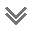

In [4]:
url = 'https://www.worldometers.info/coronavirus/'
website = requests.get(url).text
soup = BeautifulSoup(website, 'lxml')
soup

На странице две таблицы: одна отвечает за информацию на сегодняшний день (под номером 0), а вторая - за информацию на вчерашний день. Достанем обе таблицы (они лежат между тегами \<\table\>\)

In [5]:
table = soup.find_all('table')[0]
table

<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
<thead>
<tr>
<th width="1%">#</th>
<th width="100">Country,<br/>Other</th>
<th width="20">Total<br/>Cases</th>
<th width="30">New<br/>Cases</th>
<th width="30">Total<br/>Deaths</th>
<th width="30">New<br/>Deaths</th>
<th width="30">Total<br/>Recovered</th>
<th width="30">New<br/>Recovered</th>
<th width="30">Active<br/>Cases</th>
<th width="30">Serious,<br/>Critical</th>
<th width="30">Tot Cases/<br/>1M pop</th>
<th width="30">Deaths/<br/>1M pop</th>
<th width="30">Total<br/>Tests</th>
<th width="30">Tests/<br/>
<nobr>1M pop</nobr>
</th>
<th width="30">Population</th>
<th style="display:none" width="30">Continent</th>
<th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
</tr>
</thead>
<tbody>
<tr class="total_row_world row_continent" data-continent="Nor

Разобьем таблицу на строки (они лежат между тегами tr)

In [6]:
rows = table.find_all('tr')
# rows

Сначала достанем заголовки (между тегами th). Для примера достанем заголовок первой колонки.

In [7]:
rows[0].find_all('th')[1].get_text().strip()

'Country,Other'

Теперь мы можем достать содержимое ячеек таблицы (между тегами td). Для примера достанем первую запись первого по счету столбца

In [8]:
rows[0].find_all('th')[1].get_text().strip()

'Country,Other'

In [9]:
rows[1].find_all('td')[1].get_text().strip()

'North America'

Протестируем сборку на примере одной колонки, а потом пробежимся по их списку в цикле

In [10]:
col1 = []

col1.append(rows[0].find_all('th')[1].get_text().strip()) # отдельно добавляем заголовок

for row in rows[1:]: # начинаем со второго ряда таблицы, потому что 0 уже обработали выше
    r = row.find_all('td') # находим все теги td для строки таблицы
    col1.append(r[1].get_text().strip()) # сохраняем данные в наш список

print(col1)

['Country,Other', 'North America', 'Asia', 'South America', 'Europe', 'Africa', 'Oceania', '', 'World', 'USA', 'India', 'Brazil', 'Russia', 'France', 'Spain', 'Argentina', 'Colombia', 'UK', 'Mexico', 'Peru', 'South Africa', 'Italy', 'Iran', 'Germany', 'Chile', 'Iraq', 'Belgium', 'Indonesia', 'Bangladesh', 'Ukraine', 'Philippines', 'Turkey', 'Poland', 'Netherlands', 'Saudi Arabia', 'Pakistan', 'Czechia', 'Israel', 'Romania', 'Canada', 'Morocco', 'Nepal', 'Ecuador', 'Switzerland', 'Bolivia', 'Portugal', 'Panama', 'UAE', 'Qatar', 'Dominican Republic', 'Kuwait', 'Sweden', 'Oman', 'Kazakhstan', 'Costa Rica', 'Egypt', 'Guatemala', 'Austria', 'Japan', 'Belarus', 'Honduras', 'Ethiopia', 'Venezuela', 'Armenia', 'Bahrain', 'Lebanon', 'Hungary', 'Moldova', 'Jordan', 'Uzbekistan', 'Nigeria', 'Paraguay', 'Libya', 'Ireland', 'Tunisia', 'Kyrgyzstan', 'Singapore', 'Slovakia', 'Algeria', 'Azerbaijan', 'Kenya', 'Palestine', 'Myanmar', 'Bulgaria', 'Bosnia and Herzegovina', 'Croatia', 'Ghana', 'Denmark', 

Чтобы еще раз проверить, запустим для другой колонки - TotalCases

In [11]:
col2 = []

col2.append(rows[0].find_all('th')[2].get_text().strip()) # отдельно добавляем заголовок

for row in rows[1:]: # начинаем со второго ряда таблицы, потому что 0 уже обработали выше
    r = row.find_all('td') # находим все теги td для строки таблицы
    col2.append(r[2].get_text().strip()) # сохраняем данные в наш список

print(col2)

['TotalCases', '11,147,638', '13,628,875', '9,634,528', '9,818,511', '1,786,697', '37,471', '721', '46,054,441', '9,324,833', '8,143,201', '5,519,528', '1,618,116', '1,331,984', '1,264,517', '1,157,179', '1,063,151', '989,745', '918,811', '900,180', '723,682', '647,674', '612,772', '517,720', '508,571', '472,630', '412,314', '410,088', '407,684', '387,481', '380,729', '373,154', '362,731', '351,178', '347,282', '332,993', '323,673', '313,701', '241,339', '231,999', '215,294', '170,743', '167,147', '154,251', '141,631', '137,272', '132,867', '132,629', '132,556', '126,332', '125,926', '124,355', '114,434', '111,953', '108,866', '107,376', '107,339', '104,925', '99,622', '98,482', '96,888', '95,789', '91,589', '89,813', '81,466', '79,529', '75,321', '75,201', '69,306', '66,628', '62,691', '62,596', '61,095', '61,059', '59,813', '58,878', '58,015', '57,664', '57,651', '55,269', '53,797', '53,520', '52,706', '51,041', '50,090', '49,316', '48,055', '46,351', '45,137', '41,425', '38,936', '3

А теперь пройдемся циклом по 9 колонкам, сгружая данные в список списков

In [12]:
field_list = []
for i in range(9):
    col = []
    col.append(rows[0].find_all('th')[i+1].get_text().strip()) # отдельно добавляем заголовок  - по каждому из колонок
    for row in rows[1:]: # начинаем со второго ряда таблицы, потому что 0 уже обработали выше
        r = row.find_all('td') # находим все теги td для строки таблицы
        col.append(r[i+1].get_text().strip()) # сохраняем данные в наш список
    field_list.append(col)

А вот заголовок второго столбца

In [13]:
field_list[1][0]

'TotalCases'

Остается превратить эту структуру в DataFrsme. Для этого сначала превратим ее в словарь из списков, где ключами будут названия колонок.

In [14]:
d = dict()
for i in range(9):
    d[field_list[i][0]] = field_list[i][1:]
d

{'Country,Other': ['North America',
  'Asia',
  'South America',
  'Europe',
  'Africa',
  'Oceania',
  '',
  'World',
  'USA',
  'India',
  'Brazil',
  'Russia',
  'France',
  'Spain',
  'Argentina',
  'Colombia',
  'UK',
  'Mexico',
  'Peru',
  'South Africa',
  'Italy',
  'Iran',
  'Germany',
  'Chile',
  'Iraq',
  'Belgium',
  'Indonesia',
  'Bangladesh',
  'Ukraine',
  'Philippines',
  'Turkey',
  'Poland',
  'Netherlands',
  'Saudi Arabia',
  'Pakistan',
  'Czechia',
  'Israel',
  'Romania',
  'Canada',
  'Morocco',
  'Nepal',
  'Ecuador',
  'Switzerland',
  'Bolivia',
  'Portugal',
  'Panama',
  'UAE',
  'Qatar',
  'Dominican Republic',
  'Kuwait',
  'Sweden',
  'Oman',
  'Kazakhstan',
  'Costa Rica',
  'Egypt',
  'Guatemala',
  'Austria',
  'Japan',
  'Belarus',
  'Honduras',
  'Ethiopia',
  'Venezuela',
  'Armenia',
  'Bahrain',
  'Lebanon',
  'Hungary',
  'Moldova',
  'Jordan',
  'Uzbekistan',
  'Nigeria',
  'Paraguay',
  'Libya',
  'Ireland',
  'Tunisia',
  'Kyrgyzstan',
  '

А теперь сгружаем этот словарь в функцию pd.DataFrame и он превращается в искомый DataFrame

In [15]:
df = pd.DataFrame(d)
# df.head(10)
df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical"
0,North America,"11,147,638","+15,362","351,600",+635,"7,383,304","+6,834","3,412,734","20,848"
1,Asia,"13,628,875","+37,625","242,322",+781,"12,092,496","+33,647","1,294,057","21,501"
2,South America,"9,634,528",+147,"293,948",+10,"8,596,664",+419,"743,916","18,074"
3,Europe,"9,818,511","+106,756","264,317","+1,224","3,761,057","+37,497","5,793,137","20,851"
4,Africa,"1,786,697","+2,262","42,773",+55,"1,455,834",+782,"288,090","2,294"
...,...,...,...,...,...,...,...,...,...
229,Total:,"9,818,511","+106,756","264,317","+1,224","3,761,057","+37,497","5,793,137","20,851"
230,Total:,"1,786,697","+2,262","42,773",+55,"1,455,834",+782,"288,090","2,294"
231,Total:,"37,471",+15,970,,"32,662",,"3,839",25
232,Total:,721,,15,,659,,47,4


In [16]:
df.head(8)

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical"
0,North America,"11,147,638","+15,362","351,600",+635,"7,383,304","+6,834","3,412,734","20,848"
1,Asia,"13,628,875","+37,625","242,322",+781,"12,092,496","+33,647","1,294,057","21,501"
2,South America,"9,634,528",+147,"293,948",+10,"8,596,664",+419,"743,916","18,074"
3,Europe,"9,818,511","+106,756","264,317","+1,224","3,761,057","+37,497","5,793,137","20,851"
4,Africa,"1,786,697","+2,262","42,773",+55,"1,455,834",+782,"288,090","2,294"
5,Oceania,"37,471",+15,970,,"32,662",+79,"3,839",25
6,,721,,15,,659,,47,4
7,World,"46,054,441","+162,167","1,195,945","+2,705","33,322,676","+79,258","11,535,820","83,597"


Для удобства переименуем колонки с составными названиями.

In [17]:
df = df.rename(columns={'Country,Other': 'Country', 'Serious,Critical': 'SeriousCritical'}) # делать так или 
# df.rename(columns={'Country,Other': 'Country', 'Serious,Critical': 'SeriousCritical'}, inplace=True)

А теперь сгрузим весь процесс, который мы проделали, в одну функцию. Ее аргумент tag = 0 - информация за сегодняшний день, a tag=1 - информация за вчерашний день.

In [18]:
def stat(tag = 0):
    url = 'https://www.worldometers.info/coronavirus/'
    website = requests.get(url).text
    soup = BeautifulSoup(website, 'lxml')
    table = soup.find_all('table')[tag]
    rows = table.find_all('tr')
    fields_list = []

    for i in range(9):
        col = []
        col.append(rows[0].find_all('th')[i+1].get_text().strip())
        for row in rows[1:224]:
            r = row.find_all('td')
            col.append(r[i+1].get_text().strip())
        fields_list.append(col)
    d = dict()
    for i in range(9):
        d[fields_list[i][0]] = fields_list[i][1:]
    df = pd.DataFrame(d)
    df = df.rename(columns = {'Country,Other':'Country', 'Serious,Critical':'SeriousCritical'})
    return df

В первых 8 строках таблицы в колонке Country лежат регионы + Мир. Одна строка пустая. Уберем ее с помощью спискового включения.

In [19]:
print(*list(i+'\n'  for i  in list(stat()['Country'][:8]) if i!=''))

North America
 Asia
 South America
 Europe
 Africa
 Oceania
 World



А с 8 по 220 строки лежат названия стран. Выведем ее с помощью спискового включения по 6 стран в линию (для этого вставим символ переноса строки)

In [20]:
x = stat()['Country'][8:220]


In [21]:
for i, e in enumerate(x):
    print(i, e)

0 USA
1 India
2 Brazil
3 Russia
4 France
5 Spain
6 Argentina
7 Colombia
8 UK
9 Mexico
10 Peru
11 South Africa
12 Italy
13 Iran
14 Germany
15 Chile
16 Iraq
17 Belgium
18 Indonesia
19 Bangladesh
20 Ukraine
21 Philippines
22 Turkey
23 Poland
24 Netherlands
25 Saudi Arabia
26 Pakistan
27 Czechia
28 Israel
29 Romania
30 Canada
31 Morocco
32 Nepal
33 Ecuador
34 Switzerland
35 Bolivia
36 Portugal
37 Panama
38 UAE
39 Qatar
40 Dominican Republic
41 Kuwait
42 Sweden
43 Oman
44 Kazakhstan
45 Costa Rica
46 Egypt
47 Guatemala
48 Austria
49 Japan
50 Belarus
51 Honduras
52 Ethiopia
53 Venezuela
54 Armenia
55 Bahrain
56 Lebanon
57 Hungary
58 Moldova
59 Jordan
60 Uzbekistan
61 Nigeria
62 Paraguay
63 Libya
64 Ireland
65 Tunisia
66 Kyrgyzstan
67 Singapore
68 Slovakia
69 Algeria
70 Azerbaijan
71 Kenya
72 Palestine
73 Myanmar
74 Bulgaria
75 Bosnia and Herzegovina
76 Croatia
77 Ghana
78 Denmark
79 Serbia
80 Afghanistan
81 Georgia
82 Greece
83 Slovenia
84 El Salvador
85 Malaysia
86 North Macedonia
87 Austral

In [22]:
x = stat()['Country'][8:220]
import re
# print(x)
print(', '.join([e+'\n' if i%6 == 5 else e for i,e in enumerate(x)]).replace('\n,',',\n'))


USA, India, Brazil, Russia, France, Spain,
 Argentina, Colombia, UK, Mexico, Peru, South Africa,
 Italy, Iran, Germany, Chile, Iraq, Belgium,
 Indonesia, Bangladesh, Ukraine, Philippines, Turkey, Poland,
 Netherlands, Saudi Arabia, Pakistan, Czechia, Israel, Romania,
 Canada, Morocco, Nepal, Ecuador, Switzerland, Bolivia,
 Portugal, Panama, UAE, Qatar, Dominican Republic, Kuwait,
 Sweden, Oman, Kazakhstan, Costa Rica, Egypt, Guatemala,
 Austria, Japan, Belarus, Honduras, Ethiopia, Venezuela,
 Armenia, Bahrain, Lebanon, Hungary, Moldova, Jordan,
 Uzbekistan, Nigeria, Paraguay, Libya, Ireland, Tunisia,
 Kyrgyzstan, Singapore, Slovakia, Algeria, Azerbaijan, Kenya,
 Palestine, Myanmar, Bulgaria, Bosnia and Herzegovina, Croatia, Ghana,
 Denmark, Serbia, Afghanistan, Georgia, Greece, Slovenia,
 El Salvador, Malaysia, North Macedonia, Australia, S. Korea, Cameroon,
 Ivory Coast, Albania, Norway, Montenegro, Luxembourg, Madagascar,
 Zambia, Finland, Senegal, Lithuania, Sudan, Namibia,
 Mozambi

Для вывода результатов в текстовом формате воспользуемся библиотекой tabulate (в таком формате мы будем отправлять результаты в telegram'е)

Например общее количество случаев заболевания коронавирусом в Великобритании вывести можно так:

In [23]:
x = df[['Country','TotalCases']][df['Country']=='UK'].reset_index(drop=True)
print(tabulate(x, headers = x.columns, tablefmt="grid"))

+----+-----------+--------------+
|    | Country   | TotalCases   |
+====+===========+==============+
|  0 | UK        | 989,745      |
+----+-----------+--------------+


In [24]:
df[['Country','TotalCases']][df['Country']=='UK'].reset_index(drop=True)

,Country,TotalCases
0,UK,"989,745"
